In [1]:
data=[]
file_name = "../../dataset/中国租房信息数据集.csv"
with open(file=file_name,mode='r',encoding='utf8') as f:
    keys = f.readline().strip().split(',')
    keys = keys[1:3]+keys[-29:]
    for idx,line in enumerate(f):
        line = line.strip()
        # 删除地址详情列
        if line:
            line = line.split(',')
            line = line[1:3]+line[-29:]
        data.append(line)
import numpy as np
data = np.array(data, dtype=object)
data_dict = {keys[i]: data[:, i] for i in range(data.shape[1])}
len(data_dict)

31

In [2]:
# 条形图数据初始化
models = []
mse_scores = []   # 均方误差（MSE）分数
mae_scores = []     # 平均绝对误差（MAE）分数

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA


df = pd.DataFrame(data_dict)

# 特征和目标变量
X = df.drop(columns=['价格'])
y = pd.to_numeric(df['价格'])
# y = df['价格']
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数值特征
numeric_features = ['面积','lng','lat','最近学校距离','周边学校个数','最近医院距离','周边医院个数']

# 类别特征
categorical_features = ['租房网站名称', '小区', '城市','区','室','卫','厅','朝向',
'所属楼层','总楼层','是否有阳台','信息发布人类型','是否有床','是否有衣柜','是否有沙发',
'是否有电视','是否有冰箱','是否有洗衣机','是否有空调','是否有热水器','是否有宽带',
'是否有燃气','是否有暖气']

# 数值特征处理：缺失值填补+标准化
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),('pca', PCA(n_components=5))
])

# 类别特征处理：缺失值填补+独热编码
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# 将所有处理步骤整合到 ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [4]:
# 查看处理后的数据
# 使用数值转换器处理数值特征
numeric_data_transformed = numeric_transformer.fit_transform(df[numeric_features])
print("Transformed Numeric Data:\n", numeric_data_transformed)

# 使用分类转换器处理分类特征
categorical_data_transformed = categorical_transformer.fit_transform(df[categorical_features])
print("Transformed Categorical Data:\n", categorical_data_transformed.toarray())


Transformed Numeric Data:
 [[-1.08236236 -1.18462777  0.29024509  0.15726283 -0.05551147]
 [-2.01607925 -0.85552705  1.11177865 -0.46946904 -0.08979506]
 [-1.04486146 -0.64111212  0.25392888  1.30999367  0.50613299]
 ...
 [-2.27494916  0.14667134 -0.78767013  1.1408815   1.7930594 ]
 [-2.47892007  0.31810764 -1.11037559  0.78525693  1.49844387]
 [-2.44719844  0.22649095 -1.19131864  0.70320474  1.54122334]]
Transformed Categorical Data:
 [[0. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 ...
 [0. 0. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


In [5]:

def MLtrain(regressorModel):

    
    # 将预处理步骤和回归模型整合到 Pipeline 中
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', regressorModel)])
    

    # 训练模型
    model.fit(X_train, y_train)

    # 预测和评估
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")

    # 条形图数据
    
    mse_scores.append(mse)
    mae_scores.append(mae)

    return model


In [6]:
# 使用线性回归得到模型
from sklearn.linear_model import LinearRegression
models.append('线性回归')
linearRegressionModel = MLtrain(LinearRegression())
# 线性回归模型保存
import joblib
joblib.dump(linearRegressionModel, './models2/linearRegressionModel.pkl')

Mean Squared Error: 130007065.30
Mean Absolute Error: 2846.40


['./models2/linearRegressionModel.pkl']

In [7]:
# 随机森林回归
from sklearn.ensemble import RandomForestRegressor
models.append('随机森林回归')
randomForestRegressorModel = MLtrain(RandomForestRegressor())
joblib.dump(randomForestRegressorModel, './models2/randomForestRegressorModel.pkl')

Mean Squared Error: 56708302.70
Mean Absolute Error: 1771.53


['./models2/randomForestRegressorModel.pkl']

In [8]:
# 支持向量机
from sklearn.svm import SVR

models.append('支持向量机')
SVRModel = MLtrain(SVR())
joblib.dump(SVRModel, './models2/SVRModel.pkl')

Mean Squared Error: 229178640.80
Mean Absolute Error: 5233.83


['./models2/SVRModel.pkl']

In [9]:
# K近邻回归
from sklearn.neighbors import KNeighborsRegressor
models.append('K近邻回归')
kNeighborsRegressorModel = MLtrain(KNeighborsRegressor(n_neighbors=5))
joblib.dump(kNeighborsRegressorModel, './models2/kNeighborsRegressorModel.pkl')

Mean Squared Error: 90604668.59
Mean Absolute Error: 2361.35


['./models2/kNeighborsRegressorModel.pkl']

In [10]:
# 决策树回归
from sklearn.tree import DecisionTreeRegressor
models.append('决策树回归')
decisionTreeRegressorModel = MLtrain(DecisionTreeRegressor())
joblib.dump(decisionTreeRegressorModel, './models2/decisionTreeRegressorModel.pkl')

Mean Squared Error: 124942641.17
Mean Absolute Error: 2283.17


['./models2/decisionTreeRegressorModel.pkl']

In [11]:
# 梯度提升回归
from sklearn.ensemble import GradientBoostingRegressor
models.append('梯度提升回归')
gradientBoostingRegressorModel = MLtrain(GradientBoostingRegressor())
joblib.dump(gradientBoostingRegressorModel, './models2/gradientBoostingRegressorModel.pkl')

Mean Squared Error: 59879410.46
Mean Absolute Error: 2753.28


['./models2/gradientBoostingRegressorModel.pkl']

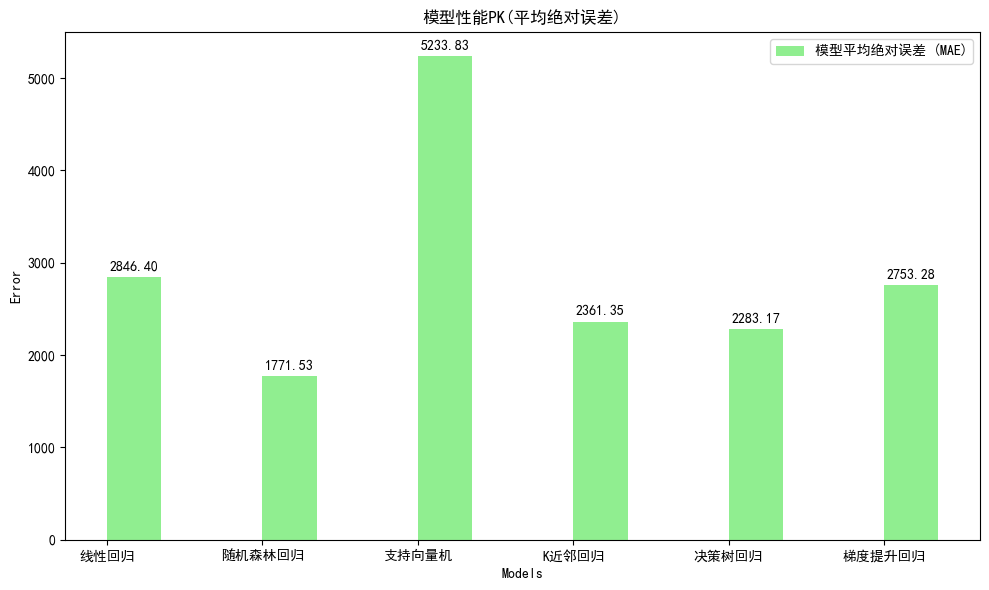

In [12]:
import matplotlib.pyplot as plt
import numpy as np
# 设置中文字体（根据您的系统和字体库进行调整）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文显示使用的字体
# 设置条形图的宽度
bar_width = 0.35
index = np.arange(len(models))

# 绘制条形图
fig, ax = plt.subplots(figsize=(10, 6))
# bar1 = ax.bar(index - bar_width/2, mse_scores, bar_width, label='Mean Squared Error (MSE)', color='skyblue')
bar2 = ax.bar(index + bar_width/2, mae_scores, bar_width, label='模型平均绝对误差 (MAE)', color='lightgreen')
# bar3 = ax.bar(index + bar_width/2, r2_scores, bar_width, label='R平方（R-squared, R²）', color='lightgreen')

# 添加标签、标题和图例
ax.set_xlabel('Models')
ax.set_ylabel('Error')
ax.set_title('模型性能PK(平均绝对误差)')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

# 显示数值标签
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# autolabel(bar1)
autolabel(bar2)
# autolabel(bar3)

plt.tight_layout()
plt.show()
